<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [353]:
!pip install pyupbit

In [354]:
import pyupbit

In [355]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-aergo", interval="minute15")
df

,open,high,low,close,volume,value
2021-12-01 17:45:00,500.0,501.0,497.0,497.0,366842.071039,1.829512e+08
2021-12-01 18:00:00,499.0,500.0,498.0,499.0,177262.071166,8.835334e+07
2021-12-01 18:15:00,499.0,500.0,497.0,499.0,208590.787646,1.039750e+08
2021-12-01 18:30:00,499.0,499.0,495.0,496.0,448628.483697,2.228367e+08
2021-12-01 18:45:00,497.0,498.0,496.0,497.0,274955.291485,1.367281e+08
...,...,...,...,...,...,...
2021-12-03 18:30:00,510.0,511.0,507.0,510.0,259275.247500,1.319997e+08
2021-12-03 18:45:00,510.0,516.0,510.0,516.0,646344.547968,3.321010e+08
2021-12-03 19:00:00,516.0,519.0,515.0,518.0,448555.723745,2.321713e+08
2021-12-03 19:15:00,518.0,519.0,514.0,516.0,458231.231356,2.365983e+08


In [356]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-12-01 17:45:00,497.0
1,2021-12-01 18:00:00,499.0
2,2021-12-01 18:15:00,499.0
3,2021-12-01 18:30:00,496.0
4,2021-12-01 18:45:00,497.0
...,...,...
195,2021-12-03 18:30:00,510.0
196,2021-12-03 18:45:00,516.0
197,2021-12-03 19:00:00,518.0
198,2021-12-03 19:15:00,516.0


In [357]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [358]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

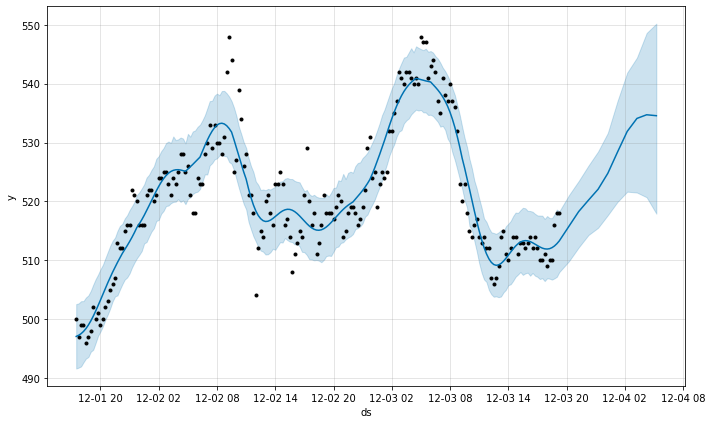

In [359]:
#그래프1
fig1 = model.plot(forecast)

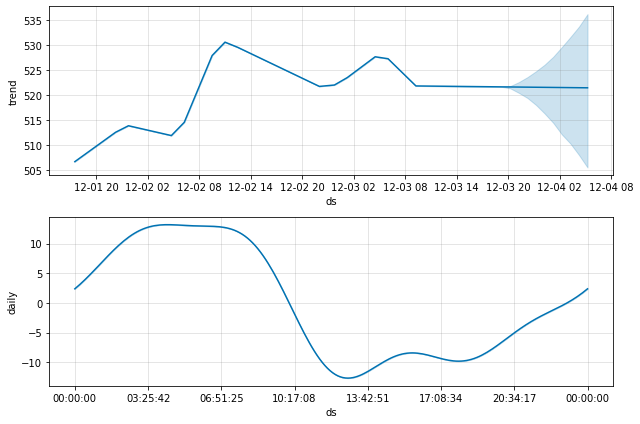

In [360]:
#그래프2
fig2 = model.plot_components(forecast)